## Global Power Plant

### Objective

- The global power plant dataset we are classifying based on fuel type(primary fuel) and predicting the capacity generted in megawatts using Regression model. The data has 27 input variables and 907 instances (observations).

### Importing the Libraries

In [1]:
# Numerical libraries
import numpy as np  
import pandas as pd  # to handle data in form of rows and columns   
import matplotlib.pyplot as plt   # importing ploting libraries
import matplotlib.style
from matplotlib import pyplot
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns  #importing seaborn for statistical plots

### Importing the Dataset

In [2]:
# reading the CSV file into pandas dataframe
df=pd.read_csv(r'C:\Users\Dell\Documents\global-power-plant.csv') 

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(15)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
228,IND,India,GHATGHAR PSS,IND0000129,250.00,19.5334,73.6509,Hydro,NaN,NaN,...,2019.0,NaN,318.64875,300.3507,381.95065,152.06585,192.01510,NaN,Central Electricity Authority,NaN
752,IND,India,Sadeipali - REHPL Solar Power Plant,WRI1026201,1.00,20.7325,83.4632,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,IND,India,PALATANA CCPP,IND0000317,726.60,23.4987,91.4385,Gas,NaN,NaN,...,2019.0,NaN,2391.79600,3337.2930,3993.95800,3870.43000,4515.95480,NaN,Central Electricity Authority,NaN
316,IND,India,KALLADA,IND0000177,15.00,8.9553,77.0697,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,IND,India,DULHASTI,IND0000107,390.00,33.3691,75.7985,Hydro,NaN,NaN,...,2019.0,NaN,2165.54785,2349.6726,2268.61990,2332.14070,2262.01310,NaN,Central Electricity Authority,NaN
412,IND,India,Kottamangalam Wind Farm,WRI1026067,56.25,10.6558,77.2471,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,IND,India,ATHANI SUGAR,WRI1019904,24.00,16.7708,74.9191,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,IND,India,KONASEEMA CCCP,IND0000205,445.00,16.7346,81.8622,Gas,NaN,NaN,...,2019.0,NaN,0.00000,0.0000,0.00000,NaN,0.00000,NaN,Central Electricity Authority,NaN
400,IND,India,Khadoda Solar Power Plant,WRI1026157,10.00,23.4430,73.2014,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,IND,India,Deh Solar Power Plant,WRI1026132,2.00,27.9253,72.8899,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(907, 27)

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

###### Description of the Columns

- country(text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013


## Exploratory Data Analysis

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- From the above info, we find that there are only few non null data in some of the columns. Using info, we get a short summary of global power plant dataframe is made. It prints information about index dtype, column dtype, non null values and memory usage.

#### Checking for duplicates

In [10]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh


- There are no duplicate rows in the dataset

#### Checking for null values

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- From the above, we find that all the values in columns other_fuel2,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh have complete null data.
- So,lets drop out those columns that have complete null data
- We shall treat the other columns

In [12]:
df.drop('other_fuel2',axis=1,inplace=True)

In [13]:
df.drop('other_fuel3',axis=1,inplace=True)

In [14]:
df.drop('wepp_id',axis=1,inplace=True)

In [15]:
df.drop('generation_gwh_2013',axis=1,inplace=True)

In [16]:
df.drop('generation_gwh_2019',axis=1,inplace=True)

In [17]:
df.drop('estimated_generation_gwh',axis=1,inplace=True)

In [18]:
df.shape

(907, 21)

## Treating the null values - Imputation

- As we found that there are only few rows that have null data in the columns latitude and longitude. So, lets fill out those rows with mean data.

In [19]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [20]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

- Let's drop other_fuel1 column also as it has almost 709 rows has null data i.e., 78% of data. So, let's drop out that column as well.

In [21]:
df.drop('other_fuel1',axis=1,inplace=True)

In [22]:
#It drops the rows that have complete null data
df.dropna(axis='rows',how='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We find that there is no row that has complete null values

In [23]:
#Filling commisiong year column with frequently repeated value i.e., using mode as though it's not a categorical column
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [24]:
#Filling owner column with frequently repeated value as its a categorical column
df['owner']=df['owner'].fillna(df['owner'].mode()[0])

In [25]:
#Filling geolocation_source column with frequently repeated value as its a categorical column
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [26]:
#Filling year of capacity data column with frequently repeated value though its not a categorical column
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

- Let's check if the columns generation_gwh_2014,2015,2016,2017,2018 have any outliers. Based on that we will decide whether to fill the null data with mean or median.

<AxesSubplot:xlabel='generation_gwh_2014'>

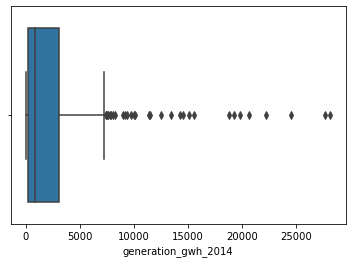

In [27]:
sns.boxplot(df['generation_gwh_2014'])

- As there are lot of outliers in the column generation_gwh_2014, lets fill it with median

In [28]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())

<AxesSubplot:xlabel='generation_gwh_2015'>

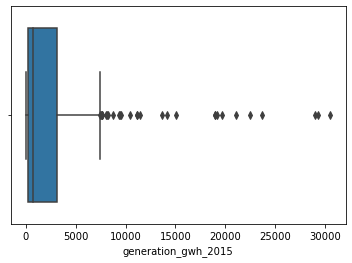

In [29]:
sns.boxplot(df['generation_gwh_2015'])

- As there are lot of outliers in the column generation_gwh_2015, lets fill it with median

In [30]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())

<AxesSubplot:xlabel='generation_gwh_2016'>

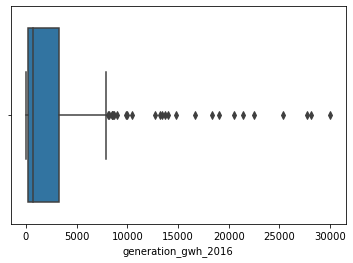

In [31]:
sns.boxplot(df['generation_gwh_2016'])

- As there are lot of outliers in the column generation_gwh_2016, lets fill it with median

In [32]:
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())

<AxesSubplot:xlabel='generation_gwh_2017'>

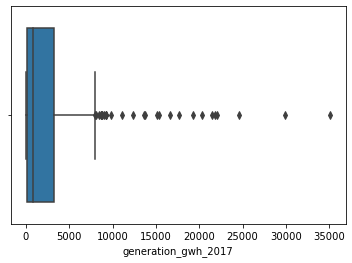

In [33]:
sns.boxplot(df['generation_gwh_2017'])

- As there are lot of outliers in the column generation_gwh_2017, lets fill it with median

In [34]:
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

<AxesSubplot:xlabel='generation_gwh_2018'>

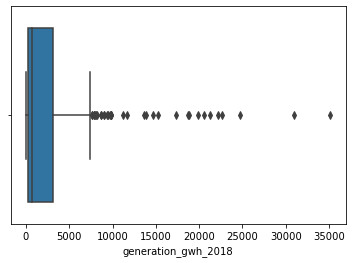

In [35]:
sns.boxplot(df['generation_gwh_2018'])

- As there are lot of outliers in the column generation_gwh_2018, lets fill it with median

In [36]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [37]:
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [38]:
df.shape

(907, 20)

In [39]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

- We find that there is no null data in the dataset as we have treated them.

In [40]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2019.0,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.812291,15.734928,0.0,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.979200,2014.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2015.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- The average capacity_mw is 326.22mw, minimum is 0 and maximum is 4760 mw
- It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.

## Exploratory Analysis and Visualization

In [41]:
df.country.nunique()

1

- There is data about only single country

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

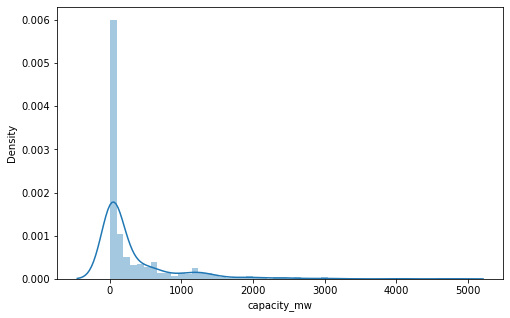

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=df.capacity_mw, kde=True)

- The average capacity of power plants lies in the range of 0 to 300 mw.

Text(0.5, 1.0, 'capacity_mw')

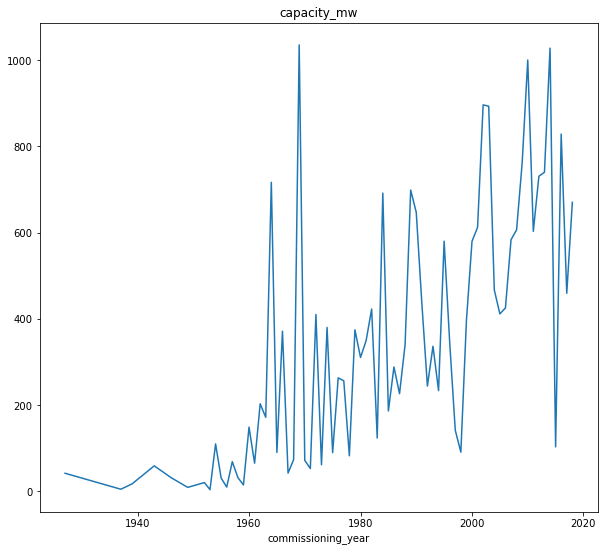

In [43]:
fig, ax = plt.subplots(figsize=(10,9))
date=df.groupby('commissioning_year').mean()
date['capacity_mw'].plot()
plt.title('capacity_mw')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

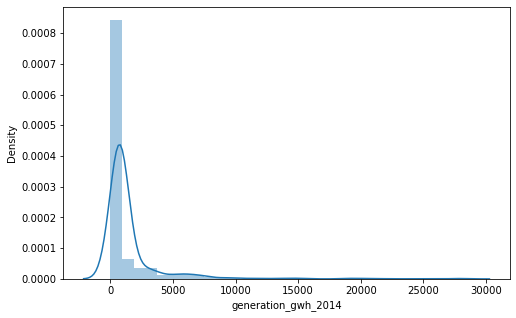

In [44]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=df.generation_gwh_2014, kde=True)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

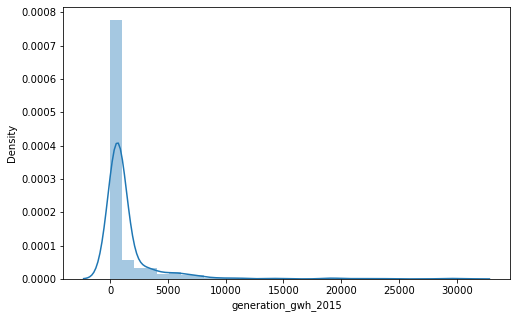

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=df.generation_gwh_2015, kde=True)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

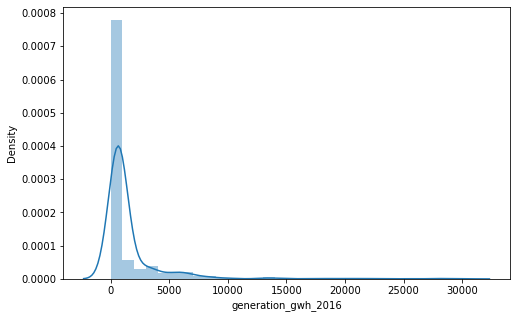

In [46]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=df.generation_gwh_2016, kde=True)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

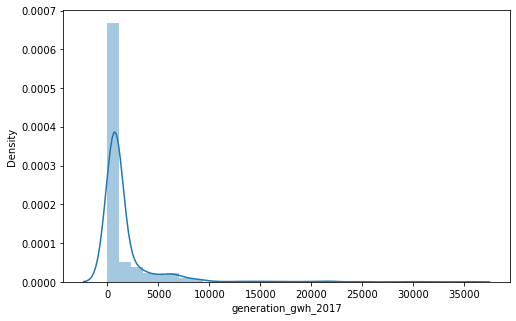

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=df.generation_gwh_2017, kde=True)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

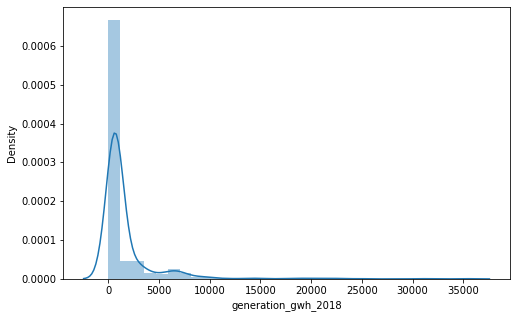

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=df.generation_gwh_2018, kde=True)

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


Text(0.5, 1.0, 'geolocation_source')

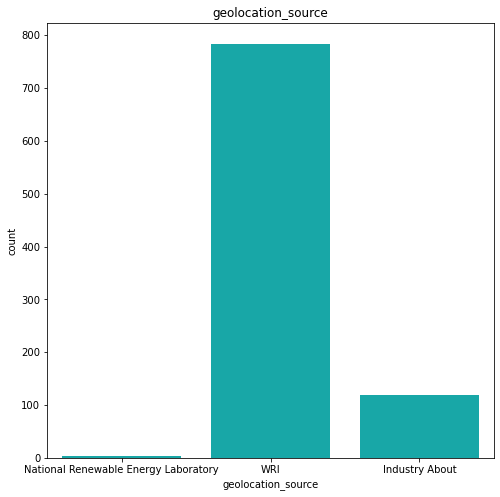

In [49]:
print(df['geolocation_source'].value_counts())
f,ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.countplot(df['geolocation_source'], color = 'c')  #Using countplot since its a categorical column
plt.title('geolocation_source')

##### Fuel use in Powerplant

In [50]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

- The most used fuel is Coal, next is Hydro 

In [51]:
per_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
per_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

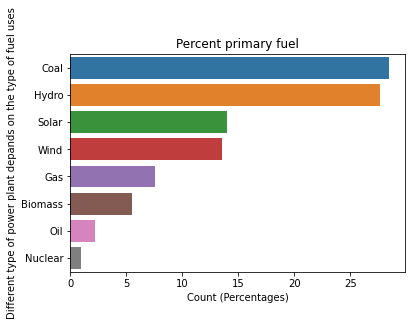

In [52]:
sns.barplot(x = per_primary_fuel, y = per_primary_fuel.index)
plt.title('Percent primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

- Renewable energy-based power plants have higher percentages that are beneficial to our future generation. It is a good sign that the use of hydro, solar and wind power plants is increasing.

##### Power plant and its capacity

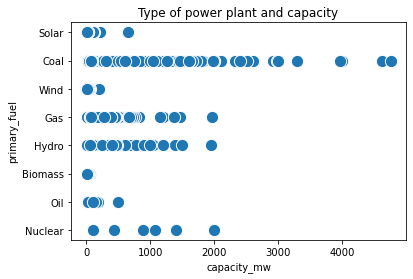

In [53]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

- The coal powerplant has the most of the high capacity powerplant. 

In [54]:
df.name.value_counts()

CHANDRAPUR MANIKGHAR    1
CHAKABURA TPP           1
VISHNU PRAYAG           1
DADRI (NCTPP)           1
NEYVELI TPS(Z)          1
                       ..
TUNGABHADRA SUGAR       1
RANJIT SAGAR            1
NITIN PLANT             1
MATATILLA               1
UTRAULA TPP             1
Name: name, Length: 907, dtype: int64

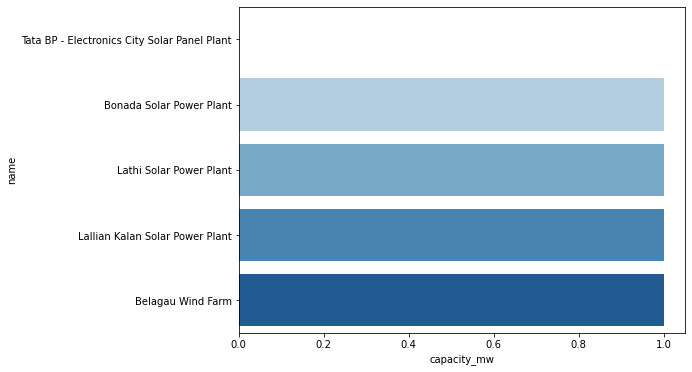

In [55]:
capacity = df['capacity_mw'].groupby(df.name).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(capacity.head(), capacity.head().index, palette='Blues')

- The above are the first 5 power plants when sorted based on capacity of powerplants in megawatt in ascending order with lowest capacity_mw

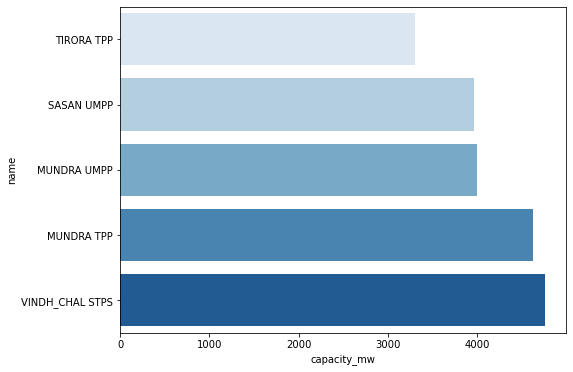

In [56]:
capacity = df['capacity_mw'].groupby(df.name).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(capacity.tail(), capacity.tail().index, palette='Blues')

- The above are the last 5 power plants when sorted based on capacity of powerplants in megawatt in ascending order with highest capacity_mw

Text(0.5, 1.0, 'Capacities of power plants')

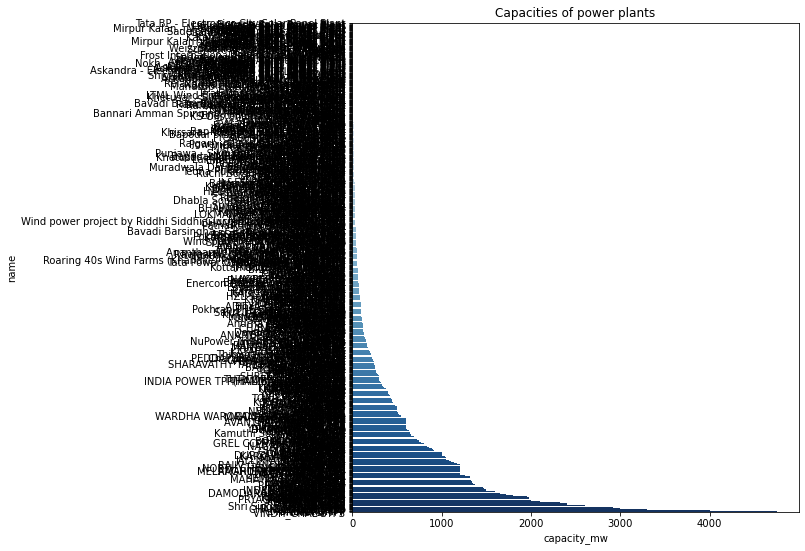

In [57]:

capacity = df['capacity_mw'].groupby(df.name).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,9))
ax = sns.barplot(capacity, capacity.index, palette='Blues')
plt.title('Capacities of power plants')

- We find there are some powerplants whose capacity is 0.

In [58]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Text(0.5, 1.0, 'Capacities of power plants based on geolocation')

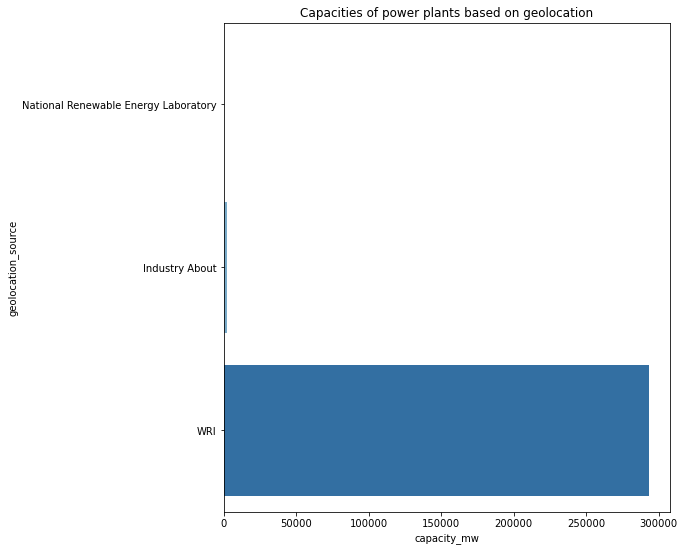

In [59]:

capacity = df['capacity_mw'].groupby(df.geolocation_source).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,9))
ax = sns.barplot(capacity, capacity.index, palette='Blues')
plt.title('Capacities of power plants based on geolocation')

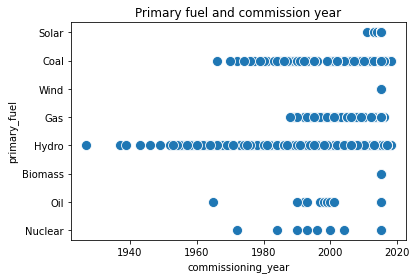

In [60]:
#Different type of primary fuel based power plant and their year of going to the first operation.

sns.scatterplot(x =df.commissioning_year, y = df.primary_fuel,s=100);
plt.title('Primary fuel and commission year');

- It is clear that the hydro power plant is the most popular among the other plants
- In the 21st century, renewable energy-based power plants (e.g. solar, gas) became more popular
- On the other hand popularity of nuclear power plants declined..

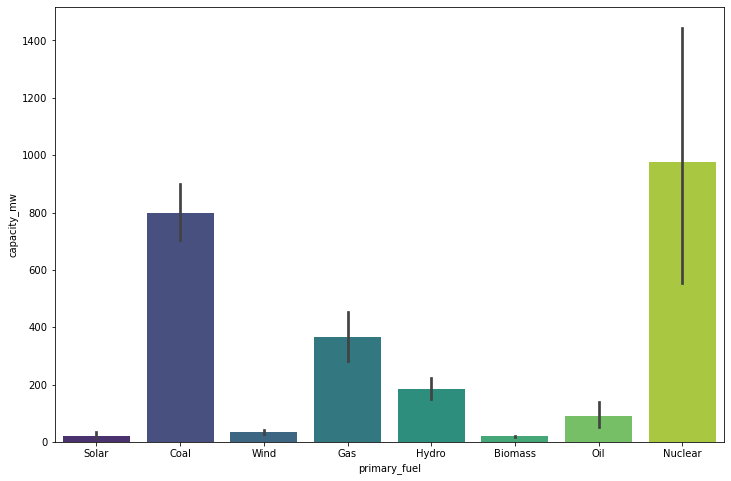

In [61]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='primary_fuel', y='capacity_mw', data=df, palette='viridis')

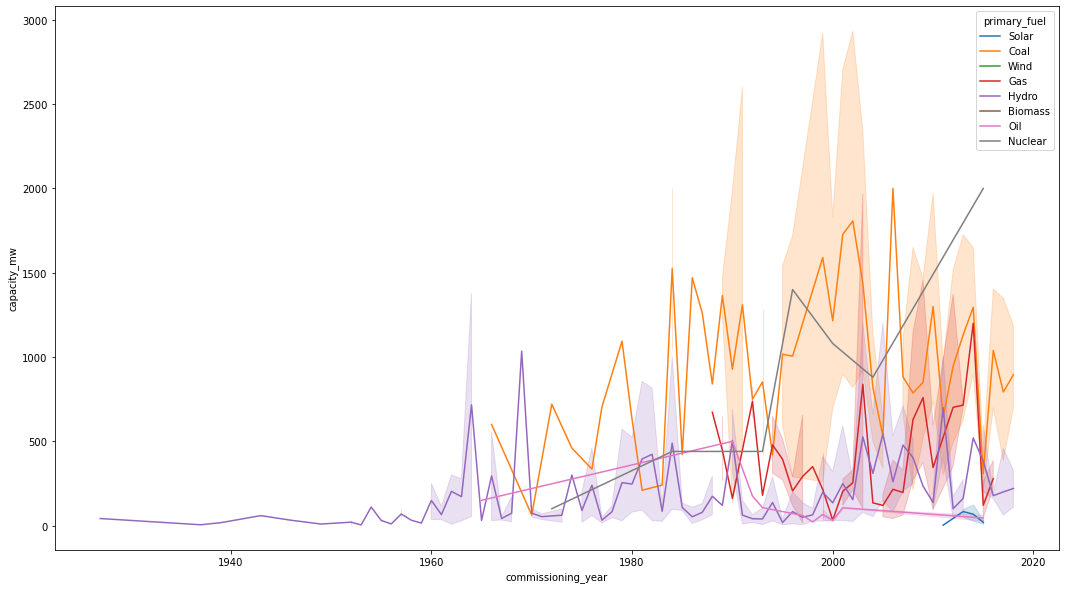

In [62]:
plt.figure(figsize=(18,10))
sns.lineplot(x="commissioning_year", y="capacity_mw", hue='primary_fuel', data=df)
#plt.xticks(rotation=90)
plt.show()

- We find that from around 1970's the consumption of coal has drastically increased and dropped from 2005's. 
- From around 2017's the consumption of both coal and biomass is almost equal.

<AxesSubplot:>

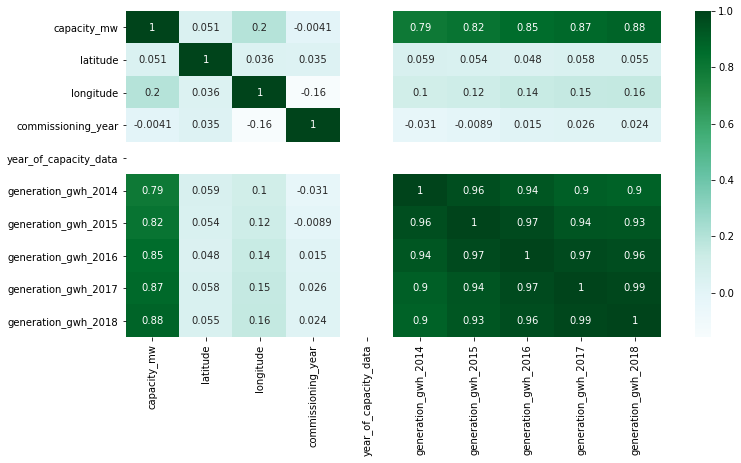

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='BuGn',annot=True)

- From the above correlation map, we find that generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are highly correlated with the capacity_mw
- Year of capacity data is no where related to capacity_mw

In [64]:
df1=df.copy()
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


- There are certain features that donot affect the model while predicting. So,lets leave out those columns and convert the remaining categorical columns
- There are several methods to convert categorical data into numerical data
- Here we use 'Label encoding' for simply converting each value in a column to a number

In [65]:
df2=df.copy()

In [66]:
#Converting 'primary_fuel' to numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [67]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

- We find that all the fuel types are converted to numeric values

In [68]:
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,1,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,2,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [69]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>],
       [<AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

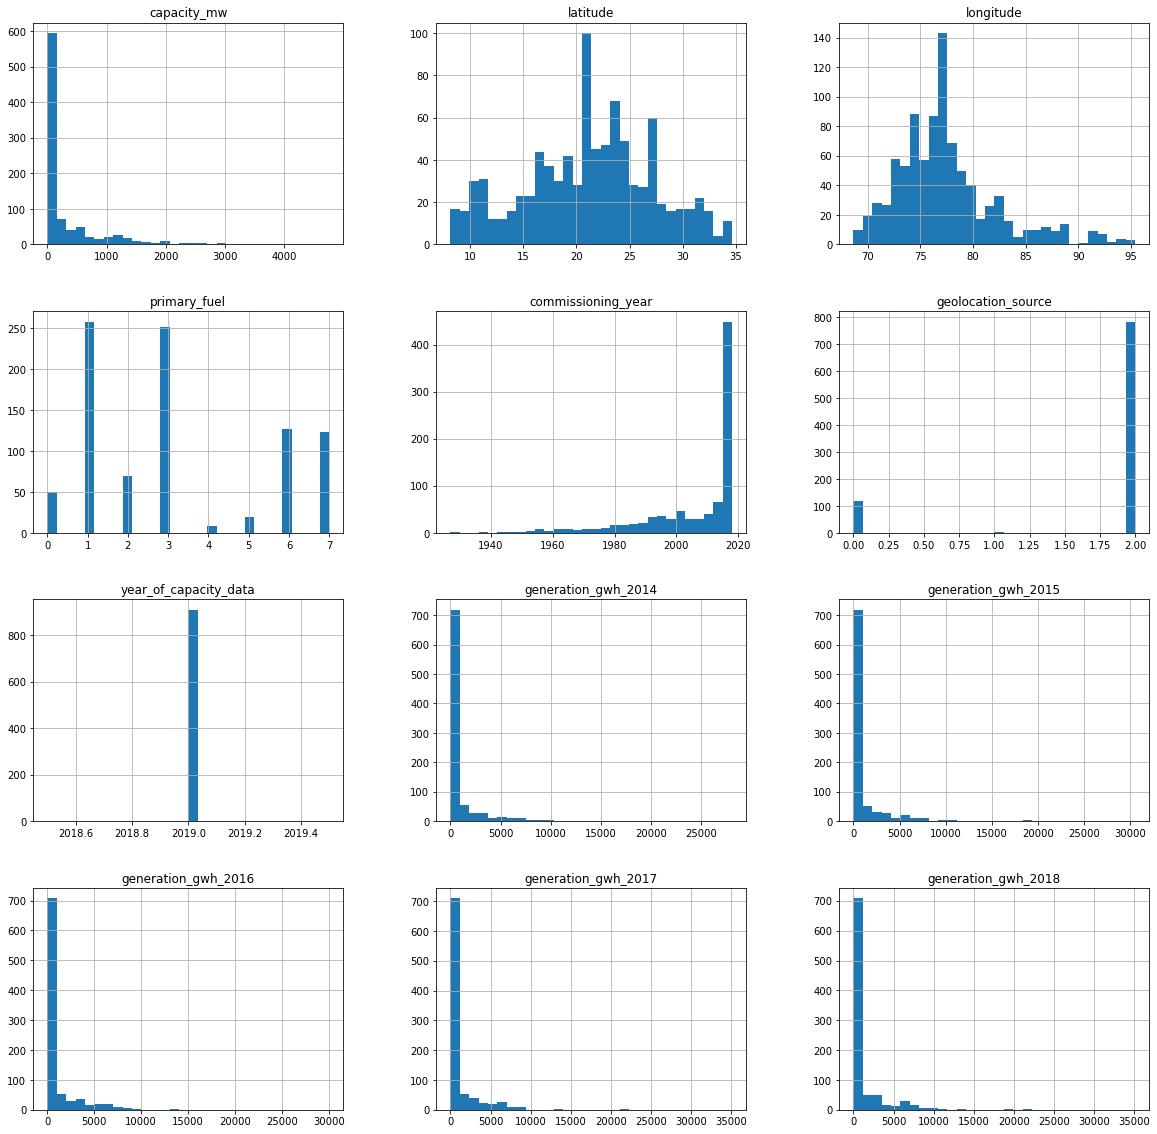

In [70]:
#Plotting  histogram to check how data is distributed
df.hist(figsize=(20,20),grid=True,layout=(4,3),bins=30)

- Only latitude and longitude columns are normally distributed
- commissionig year is left skewed
- Remaining columns are almost right skewed
- We can remove the skewness and make the columns normally distributed

In [71]:
#Checking the skewness of each column

df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
primary_fuel             0.472251
commissioning_year      -1.714873
geolocation_source      -2.159841
year_of_capacity_data    0.000000
generation_gwh_2014      5.321360
generation_gwh_2015      5.566773
generation_gwh_2016      5.281953
generation_gwh_2017      5.315103
generation_gwh_2018      5.133226
dtype: float64

- There are 3 methods to handle skewed data
   - log transform
   - box cox
   - square root transform
   
- Here we are using 'square root transform'

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

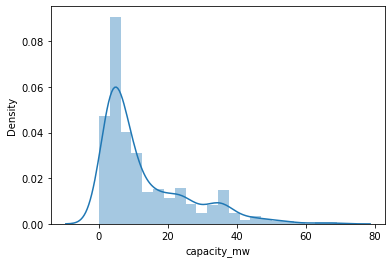

In [72]:
sqrt_cap=np.sqrt(df['capacity_mw'])
sns.distplot(sqrt_cap)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

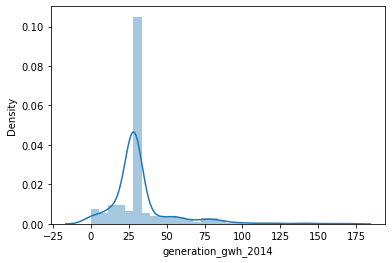

In [73]:
sqrt_2014=np.sqrt(df['generation_gwh_2014'])
sns.distplot(sqrt_2014)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

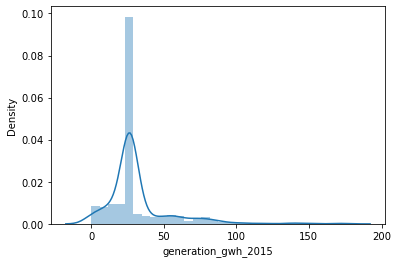

In [74]:
sqrt_2015=np.sqrt(df['generation_gwh_2015'])
sns.distplot(sqrt_2015)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

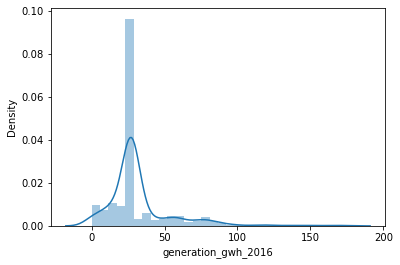

In [75]:
sqrt_2016=np.sqrt(df['generation_gwh_2016'])
sns.distplot(sqrt_2016)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

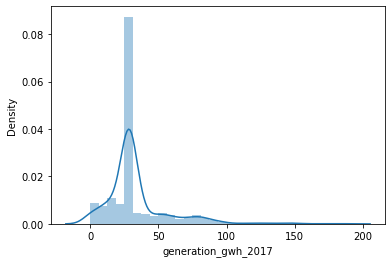

In [76]:
sqrt_2017=np.sqrt(df['generation_gwh_2017'])
sns.distplot(sqrt_2017)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

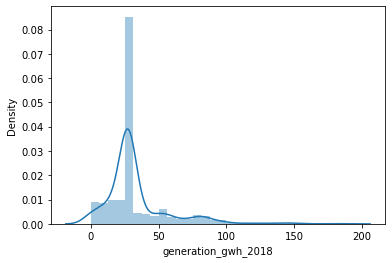

In [77]:
sqrt_2018=np.sqrt(df['generation_gwh_2018'])
sns.distplot(sqrt_2018)

#### Checking for outliers

capacity_mw                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
latitude                 AxesSubplot(0.327174,0.657941;0.168478x0.222059)
longitude                AxesSubplot(0.529348,0.657941;0.168478x0.222059)
primary_fuel             AxesSubplot(0.731522,0.657941;0.168478x0.222059)
commissioning_year          AxesSubplot(0.125,0.391471;0.168478x0.222059)
geolocation_source       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
year_of_capacity_data    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
generation_gwh_2014      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
generation_gwh_2015            AxesSubplot(0.125,0.125;0.168478x0.222059)
generation_gwh_2016         AxesSubplot(0.327174,0.125;0.168478x0.222059)
generation_gwh_2017         AxesSubplot(0.529348,0.125;0.168478x0.222059)
generation_gwh_2018         AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

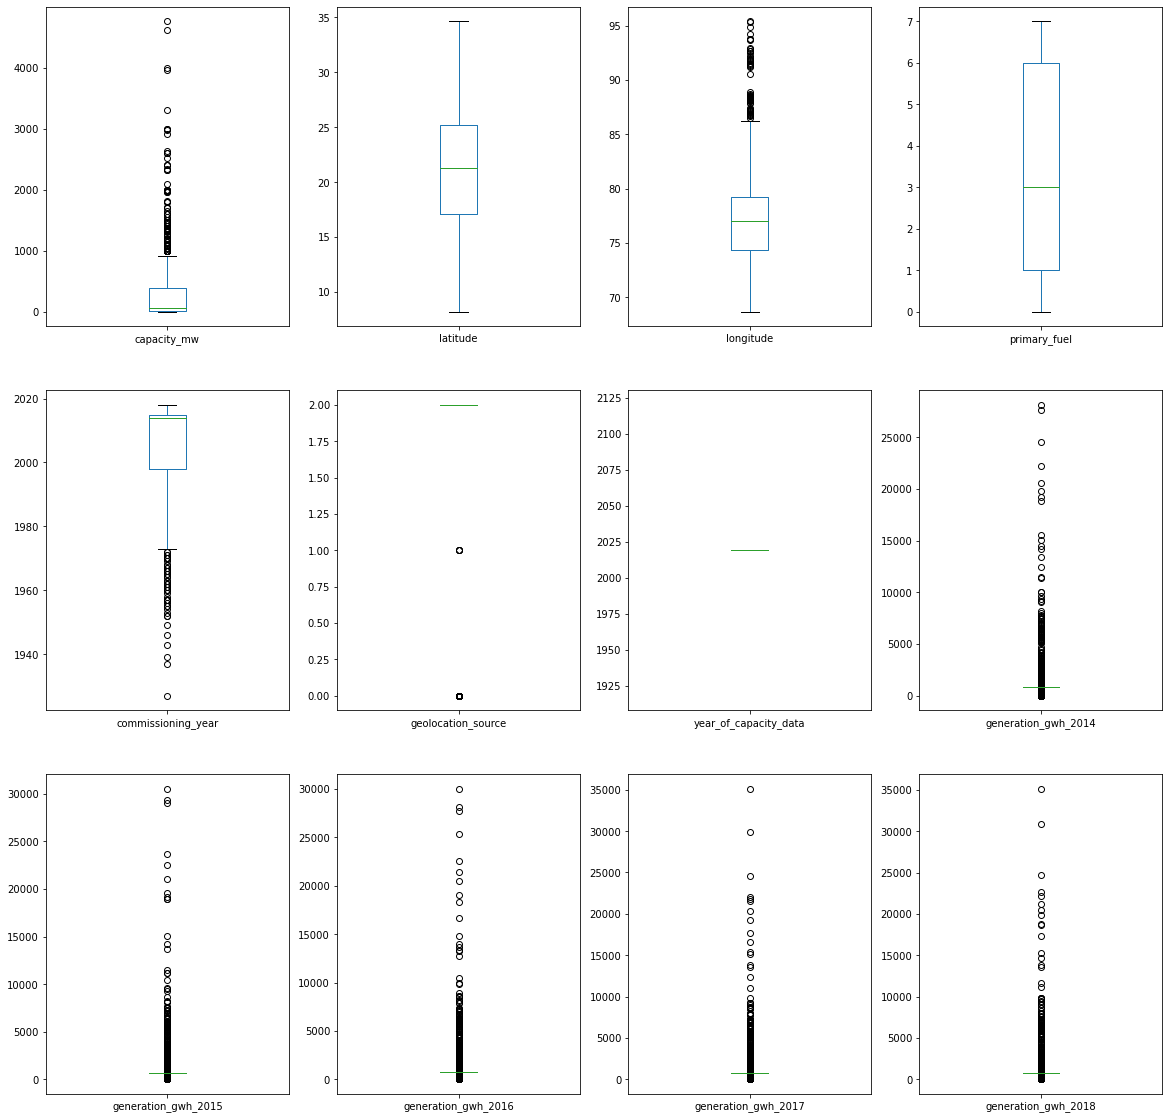

In [78]:
# Boxplots of all the columns

df.plot(kind='box',subplots=True,figsize=(20,20),layout=(3,4))

In [79]:
def drop_outliers(df,col_name):
    iqr=1.5+(np.percentile(df[col_name],75)-np.percentile(df[col_name],25))
    df.drop(df[df[col_name]>(iqr+np.percentile(df[col_name],75))].index,inplace=True)
    df.drop(df[df[col_name]<(np.percentile(df[col_name],25)-iqr)].index,inplace=True)

In [80]:
drop_outliers(df1,'capacity_mw')

In [81]:
drop_outliers(df1,'longitude')

In [82]:
drop_outliers(df1,'commissioning_year')

In [83]:
df1.shape

(640, 20)

- We are not going to treat the outliers in the df dataframe as we have noticed that the shape of the dataset df1 has been reduced to 640 rows. With less data, we cant build the models and can't predict with good accuracy.

In [84]:
df.shape

(907, 20)

In [86]:
df['country'] = le.fit_transform(df['country'])


In [87]:
df['country_long'] = le.fit_transform(df['country_long'])

In [88]:
df['name'] = le.fit_transform(df['name'])

In [89]:
df['gppd_idnr'] = le.fit_transform(df['gppd_idnr'])

In [90]:
df['owner'] = le.fit_transform(df['owner'])

In [91]:
df['generation_data_source']=le.fit_transform(df['generation_data_source'])

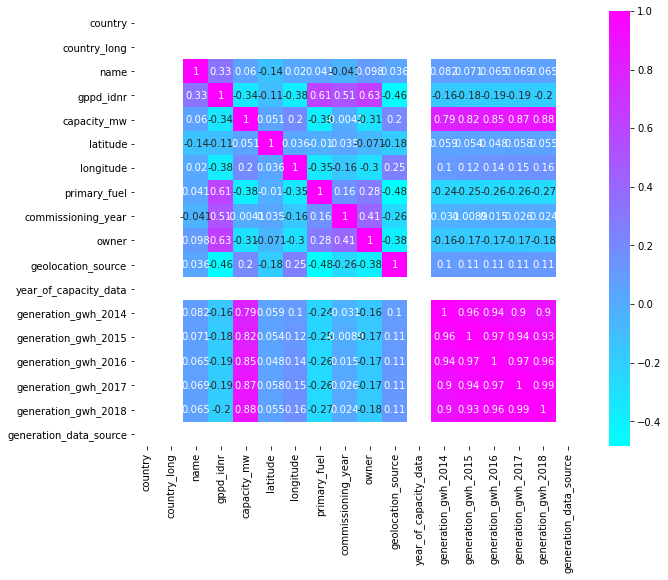

In [92]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

## Prediction with Capacity_mw

- We are dropping the target variable 'capacity_mw' for building the models and 'country','country_long','name','gppd_idnr',	'owner','source','url' and 'generation_data_source' column as they have nothing to do with models building.

In [93]:
x = df.drop(['capacity_mw','source','url'], axis=1)
y = df['capacity_mw']


- Here we are using the Standard Scalar method on x for scaling the data 

In [94]:
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

##### Splitting the data into train and test

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, random_state=42,test_size=0.25)

##### Building the models

In [96]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

##### LINEAR REGRESSION

In [97]:
#LINEAR REGRESSION
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Scores:
print("Model training score:",lr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',lr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 84.56178794632922 %
Model Testing Score: 78.6785495396926 %
R2 Score: 0.786785495396926
MSE: 70801.34466244439
RMSE:  266.0852206764675


##### #RANDOM FOREST REGRESSOR

In [98]:
#RANDOM FOREST REGRESSOR
rfr= RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

# Scores:
print("Model training score:",rfr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',rfr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 97.95784520457796 %
Model Testing Score: 87.08244804862136 %
R2 Score: 0.8708244804862136
MSE: 42894.83258220156
RMSE:  207.1106771323042


##### K NEIGHBOR REGRESSOR

In [99]:
#K NEIGHBOR REGRESSOR
KNN= KNeighborsRegressor()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

# Scores:
print("Model training score:",KNN.score(x_train,y_train)*100,'%')
print('Model Testing Score:',KNN.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 88.71364164843219 %
Model Testing Score: 78.07165042668278 %
R2 Score: 0.7807165042668278
MSE: 72816.65189285691
RMSE:  269.8456075107707


##### DECISION TREE REGRESSOR

In [100]:
#DECISION TREE REGRESSOR
dtr=DecisionTreeRegressor(random_state=1)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

# Scores:
print("Model training score:",dtr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',dtr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 100.0 %
Model Testing Score: 77.08906741443961 %
R2 Score: 0.7708906741443962
MSE: 76079.47862403085
RMSE:  275.8250870099216


##### RIDGE REGRESSION

In [101]:
#RIDGE REGRESSION
ri=Ridge()
ri.fit(x_train, y_train)
y_pred = ri.predict(x_test)

# Scores:
print("Model training score:",ri.score(x_train,y_train)*100,'%')
print('Model Testing Score:',ri.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 84.55291278293807 %
Model Testing Score: 78.60680762594723 %
R2 Score: 0.7860680762594723
MSE: 71039.57535745669
RMSE:  266.5325033789626


##### LASSO REGRESSION

In [102]:
from sklearn.linear_model import LassoCV

In [103]:
lassocv=LassoCV(alphas=None,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)
alpha=lassocv.alpha_
alpha


0.06661873088654721

In [104]:
#LASSO REGRESSION
la= Lasso(alpha,max_iter=1000,normalize=False)
la.fit(x_train, y_train)
y_pred = la.predict(x_test)

# Scores:
print("Model training score:",la.score(x_train,y_train)*100,'%')
print('Model Testing Score:',la.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 84.56123770736251 %
Model Testing Score: 78.68398371845092 %
R2 Score: 0.7868398371845092
MSE: 70783.29958788713
RMSE:  266.0513100660982


##### SUPPORT VECTOR REGRESSOR

In [105]:
#SUPPORT VECTOR REGRESSOR
svr= SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

# Scores:
print("Model training score:",svr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',svr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: -14.479676114463548 %
Model Testing Score: -15.700592323284045 %
R2 Score: -0.15700592323284046
MSE: 384202.6380888019
RMSE:  619.8408167334593


##### ADA BOOST REGRESSOR

In [106]:
#ADA BOOST REGRESSOR
abr=AdaBoostRegressor()
abr.fit(x_train, y_train)
y_pred = abr.predict(x_test)

# Scores:
print("Model training score:",abr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',abr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 76.86936223161935 %
Model Testing Score: 71.37800381165111 %
R2 Score: 0.7137800381165111
MSE: 95043.99434883676
RMSE:  308.29206014563005


##### GRADIENT BOOST REGRESSOR

In [107]:
#GRADIENT BOOST REGRESSOR
gbr= GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)

# Scores:
print("Model training score:",gbr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',gbr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 97.49294444192766 %
Model Testing Score: 84.63712892548223 %
R2 Score: 0.8463712892548223
MSE: 51014.91251622608
RMSE:  225.86481026540207


- Let us define a for loop to identify for which random state and for which model R2 score is highest.

In [108]:
model=[LinearRegression(),AdaBoostRegressor(),GradientBoostingRegressor(),
      KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),Ridge(),Lasso(),SVR()]
max_r2_score=0
n=10 #for 10 random states of range 40 to 90
r=[]
import random
for j in range(n):
    r.append(random.randint(40,90))
    
for random_state in r:
    x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, random_state=random_state,test_size=0.25)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        R2_score=r2_score(y_test,pred)
        print('R2 score for randomstate',random_state,'for model',i,'is',R2_score)
        if R2_score>max_r2_score:
            max_r2_score=R2_score
            final_random_state=random_state
            final_model=i
print()
print('#'*100)
print('Max R2 score corresponding to randomstate',final_random_state,'is',max_r2_score,'and model is',final_model)

R2 score for randomstate 83 for model LinearRegression() is 0.8405470799190153
R2 score for randomstate 83 for model AdaBoostRegressor() is 0.7580254738475037
R2 score for randomstate 83 for model GradientBoostingRegressor() is 0.8644182346718643
R2 score for randomstate 83 for model KNeighborsRegressor() is 0.8340386229824576
R2 score for randomstate 83 for model DecisionTreeRegressor() is 0.8255005588245806
R2 score for randomstate 83 for model RandomForestRegressor() is 0.8707218946976897
R2 score for randomstate 83 for model Ridge() is 0.8404453234154017
R2 score for randomstate 83 for model Lasso() is 0.8413205100789019
R2 score for randomstate 83 for model SVR() is -0.11502517399329903
R2 score for randomstate 88 for model LinearRegression() is 0.7774888414413739
R2 score for randomstate 88 for model AdaBoostRegressor() is 0.6289646476209487
R2 score for randomstate 88 for model GradientBoostingRegressor() is 0.8231486865733053
R2 score for randomstate 88 for model KNeighborsRegr

- From the above for loop, we find that the Random Forest model has highest accuracy of 90.0% for the random_state 53

#### Hyperparameter Tuning on RandomForest Algorithm

- Let's perform hyperparameter tuning for finding the best parameters for Random Forest algorithm using GridSearchCV 

In [111]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, random_state=53,test_size=0.25)
rf=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,1000],
           'max_features':['auto','sqrt'],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}
rf_random=GridSearchCV(estimator=rf,param_grid=parameters,cv=3,n_jobs=-1)
rf_random.fit(x_train,y_train)
rf_random.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [112]:
rfr_tuned= RandomForestRegressor(random_state=53, n_estimators= 300, min_samples_leaf=1,min_samples_split=2)
rfr_tuned.fit(x_train, y_train)
y_pred = rfr_tuned.predict(x_test)

# Scores:
print("Model training score:",rfr_tuned.score(x_train,y_train)*100,'%')
print('Model Testing Score:',rfr_tuned.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 97.89397075398237 %
Model Testing Score: 90.27466290230221 %
R2 Score: 0.9027466290230222
MSE: 33615.31963928538
RMSE:  183.3448107781766


- When performed hyper parameter tuning, the accuracy is not increasing. So, we dont consider this tuned model.

In [113]:
summary = pd.DataFrame({'Model' : ['linear_regression','random_forest','knn','Decisiontree','ridge','lasso','svr','adaboost',
                                   'Gradient Boosting','randomforest_tuned' ],
                      'R Square': [0.786,0.870,0.780,0.7708,0.786,0.7868,-0.157,0.713,0.846,0.902],
                      'Mean Square Error' : [70801.3,43397.04,72816.6,76079.4,71039.5,70783.2,384202.6,95043.9,51014.9,33165.3]})

summary.sort_values(by='R Square',ascending=False)

,Model,R Square,Mean Square Error
9,randomforest_tuned,0.9020,33165.30
1,random_forest,0.8700,43397.04
8,Gradient Boosting,0.8460,51014.90
5,lasso,0.7868,70783.20
0,linear_regression,0.7860,70801.30
4,ridge,0.7860,71039.50
2,knn,0.7800,72816.60
3,Decisiontree,0.7708,76079.40
7,adaboost,0.7130,95043.90
6,svr,-0.1570,384202.60


### Saving the model - Prediction with Capacity_mw

In [114]:
import pickle
filename = 'globalcapacity.pkl'
pickle.dump(rfr_tuned, open(filename, 'wb'))

In [115]:
model=pickle.load(open('globalcapacity.pkl','rb'))
result=model.score(x_test,y_test)
print(result*100)

90.27466290230221


In [116]:
conclusion=pd.DataFrame([model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])

In [117]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
Predicted,128.947033,21.577333,75.353167,18.574333,53.072000,539.791673,51.436500,481.256737,20.502667,185.648153,...,220.218167,43.805667,605.704883,23.117000,1300.906267,14.277767,57.090333,483.904900,39.272333,208.292300
Original,71.356439,74.429648,66.490805,29.153479,114.015922,84.282502,89.069036,16.299315,53.772898,74.017950,...,72.952200,110.145900,70.813963,83.759922,50.294491,15.177100,90.440945,81.610116,44.634518,114.911248


- We have build the model and predicted by taking capacity_mw as output variable which is continuity in nature. So, using the regression technique
- When calculating the best randomstate, 53 is the best random state which providing the highest R2 score for this model
- After finding the model with highest R2score, we are performing hyperparameter tuning.
- We used GridSearchCV to find the best params needed for this model
- After using the best params, we got the best R2 score
- Without tuning only, random forest model got the best R2 score. So, the best fit model for predicting the power plant with capacity_mw is Random Forest Regressor model.

## Prediction with Primary_Fuel

- Here we need to predict based on 'primary_fuel' which is categorical in nature, so using the classification techniques.

In [118]:
#importing libraries for classification prediction

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score,roc_curve

- Let's convert categorical columns to numerical columns

In [119]:
df2['country'] = le.fit_transform(df2['country'])

In [120]:
df2['country_long'] = le.fit_transform(df2['country_long'])

In [121]:
df2['name'] = le.fit_transform(df2['name'])

In [122]:
df2['gppd_idnr'] = le.fit_transform(df2['gppd_idnr'])

In [123]:
df2['owner'] = le.fit_transform(df2['owner'])

In [124]:
df2['generation_data_source'] = le.fit_transform(df2['generation_data_source'])

In [125]:
df2['geolocation_source'] = le.fit_transform(df2['geolocation_source'])

In [126]:
df2.dtypes

country                     int32
country_long                int32
name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                       int32
source                     object
url                        object
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

In [127]:
x_r=df2.drop(['primary_fuel','source','url'],axis=1)
y_r=df2['primary_fuel']
print(x_r.shape)
print(y_r.shape)

(907, 17)
(907,)


In [128]:
#Standardizing the value of x so that mean will be 0 and std will become 1,and make the data normally distributed
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_r_scaler=sc.fit_transform(x_r)

##### Splitting the data into train and test

In [129]:
from sklearn.model_selection import train_test_split
xr_train, xr_test, yr_train, yr_test = train_test_split(x_r_scaler,y_r, random_state=80,test_size=0.10)

##### Building the models

In [130]:
#Defining a function to check the scores,confusion matrix and roc curve of the models
def evaluate_model(model, xr_train, xr_test, yr_train, yr_test):    
    yr_pred = model.predict(xr_test)

    #Calculating Details
    model_train_acc = round(model.score(xr_train, yr_train) * 100, 2)
    model_test_acc= round(model.score(xr_test, yr_test) * 100, 2)
    print('Train Score is : ', model_train_acc)
    print('Test Score is : ' , model_test_acc)

    #Calculating Prediction
    accuracy= accuracy_score(yr_test , yr_pred )
    print('Accuracy Score is  = ', accuracy )
    f1_score= metrics.f1_score(yr_test, yr_pred,average='micro')
    print('F1 Score: ', f1_score)
    cm = confusion_matrix(yr_test , yr_pred )
    print('confusion matrix \n',  cm)
    sns.heatmap(cm, center = True)
    plt.show()
    #Check precision, recall, f1-score
    print( classification_report(yr_test, model.predict(xr_test)))

==========LOGISTIC REGRESSION===========
Train Score is :  78.68
Test Score is :  72.53
Accuracy Score is  =  0.7252747252747253
F1 Score:  0.7252747252747253
confusion matrix 
 [[ 3  2  0  0  0  0  0]
 [ 3 21  0  3  0  0  0]
 [ 0  1  0  9  0  0  0]
 [ 0  2  1 19  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  0 12  1]
 [ 0  0  0  0  0  0 11]]


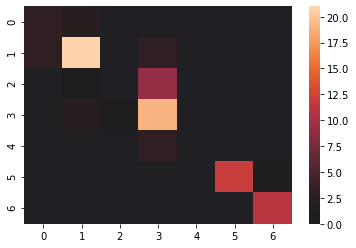

              precision    recall  f1-score   support

     Biomass       0.50      0.60      0.55         5
        Coal       0.81      0.78      0.79        27
         Gas       0.00      0.00      0.00        10
       Hydro       0.56      0.86      0.68        22
         Oil       0.00      0.00      0.00         3
       Solar       1.00      0.92      0.96        13
        Wind       0.92      1.00      0.96        11

    accuracy                           0.73        91
   macro avg       0.54      0.59      0.56        91
weighted avg       0.66      0.73      0.68        91



In [131]:
LR = LogisticRegression(max_iter=3000)
LR.fit(xr_train, yr_train)
print("==========LOGISTIC REGRESSION===========")
evaluate_model(LR,xr_train, xr_test, yr_train, yr_test)

- With logistic regression, we are able to classify Biomass,coal,Hydro,Solar,Wind and for Oil and Gas this model is not suitable

==========K NEIGHBOR CLASSIFIER===========
Train Score is :  84.56
Test Score is :  75.82
Accuracy Score is  =  0.7582417582417582
F1 Score:  0.7582417582417583
confusion matrix 
 [[ 4  1  0  0  0  0  0]
 [ 3 20  1  1  0  0  2]
 [ 0  1  2  6  1  0  0]
 [ 0  0  2 20  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  0 12  1]
 [ 0  0  0  0  0  0 11]]


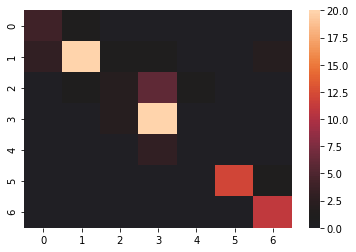

              precision    recall  f1-score   support

     Biomass       0.57      0.80      0.67         5
        Coal       0.91      0.74      0.82        27
         Gas       0.40      0.20      0.27        10
       Hydro       0.67      0.91      0.77        22
         Oil       0.00      0.00      0.00         3
       Solar       1.00      0.92      0.96        13
        Wind       0.79      1.00      0.88        11

    accuracy                           0.76        91
   macro avg       0.62      0.65      0.62        91
weighted avg       0.74      0.76      0.74        91



In [132]:
KNN= KNeighborsClassifier()
KNN.fit(xr_train, yr_train)
print("==========K NEIGHBOR CLASSIFIER===========")
evaluate_model(KNN,xr_train, xr_test, yr_train, yr_test)

- KNN classifier is suitable for classifying biomass,coal,hydro,solar,wind,gas and not suitable for oil

==========ADA BOOST CLASSIFIER===========
Train Score is :  63.36
Test Score is :  63.74
Accuracy Score is  =  0.6373626373626373
F1 Score:  0.6373626373626373
confusion matrix 
 [[ 0  0  0  5  0  0  0]
 [ 0 13  0 14  0  0  0]
 [ 0  1  0  9  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  0 12  1]
 [ 0  0  0  0  0  0 11]]


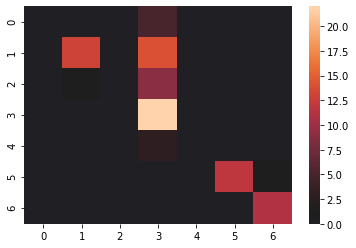

              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         5
        Coal       0.93      0.48      0.63        27
         Gas       0.00      0.00      0.00        10
       Hydro       0.42      1.00      0.59        22
         Oil       0.00      0.00      0.00         3
       Solar       1.00      0.92      0.96        13
        Wind       0.92      1.00      0.96        11

    accuracy                           0.64        91
   macro avg       0.47      0.49      0.45        91
weighted avg       0.63      0.64      0.58        91



In [133]:
AB= AdaBoostClassifier()
AB.fit(xr_train, yr_train)
print("==========ADA BOOST CLASSIFIER===========")
evaluate_model(AB,xr_train, xr_test, yr_train, yr_test)

- With ada boost classifier, we are able to classify coal,hydro,solar and not suitable for classifying biomass,gas,oil and wind

==========DECISION TREE CLASSIFIER===========
Train Score is :  100.0
Test Score is :  81.94
Accuracy Score is  =  0.8193832599118943
F1 Score:  0.8193832599118943
confusion matrix 
 [[11  3  0  0  0  0  0  0]
 [ 3 45  2  4  0  1  0  0]
 [ 1  6 10  6  0  0  0  0]
 [ 0  6  4 51  0  0  0  0]
 [ 0  2  0  0  0  1  0  0]
 [ 0  2  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 28]]


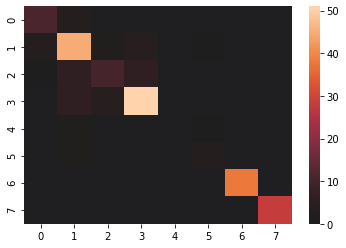

              precision    recall  f1-score   support

     Biomass       0.73      0.79      0.76        14
        Coal       0.70      0.82      0.76        55
         Gas       0.62      0.43      0.51        23
       Hydro       0.84      0.84      0.84        61
     Nuclear       0.00      0.00      0.00         3
         Oil       0.60      0.60      0.60         5
       Solar       1.00      1.00      1.00        38
        Wind       1.00      1.00      1.00        28

    accuracy                           0.82       227
   macro avg       0.69      0.68      0.68       227
weighted avg       0.81      0.82      0.81       227



In [141]:
DT= DecisionTreeClassifier()
DT.fit(xr_train, yr_train)
print("==========DECISION TREE CLASSIFIER===========")
evaluate_model(DT,xr_train, xr_test, yr_train, yr_test)

- with decision tree classifier, we are able to classify all fuel types biomass,coal,hydro,solar,wind, gas and oil

==========RANDOM FOREST CLASSIFIER===========
Train Score is :  100.0
Test Score is :  82.82
Accuracy Score is  =  0.8281938325991189
F1 Score:  0.828193832599119
confusion matrix 
 [[11  3  0  0  0  0  0  0]
 [ 2 49  1  3  0  0  0  0]
 [ 1  8  5  8  0  1  0  0]
 [ 0  6  0 55  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 28]]


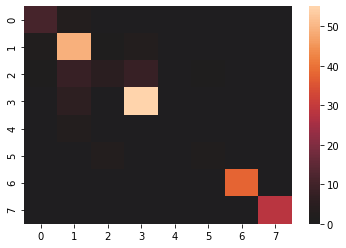

              precision    recall  f1-score   support

     Biomass       0.79      0.79      0.79        14
        Coal       0.71      0.89      0.79        55
         Gas       0.56      0.22      0.31        23
       Hydro       0.83      0.90      0.87        61
     Nuclear       0.00      0.00      0.00         3
         Oil       0.67      0.40      0.50         5
       Solar       1.00      1.00      1.00        38
        Wind       1.00      1.00      1.00        28

    accuracy                           0.83       227
   macro avg       0.69      0.65      0.66       227
weighted avg       0.81      0.83      0.81       227



In [154]:
RF= RandomForestClassifier()
RF.fit(xr_train, yr_train)
print("==========RANDOM FOREST CLASSIFIER===========")
evaluate_model(RF,xr_train, xr_test, yr_train, yr_test)

- With Random forest classifier, we are able to classify all fuel types perfectly

==========GAUSSIAN NB===========
Train Score is :  62.5
Test Score is :  62.64
Accuracy Score is  =  0.6263736263736264
F1 Score:  0.6263736263736264
confusion matrix 
 [[ 4  0  0  0  0  0  0  1]
 [ 3  7  0  6  6  0  0  5]
 [ 0  1  0  9  0  0  0  0]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 11]]


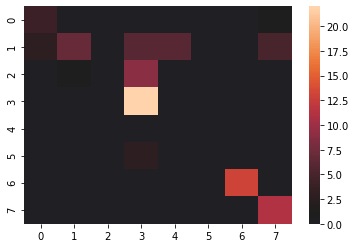

              precision    recall  f1-score   support

     Biomass       0.57      0.80      0.67         5
        Coal       0.88      0.26      0.40        27
         Gas       0.00      0.00      0.00        10
       Hydro       0.55      1.00      0.71        22
     Nuclear       0.00      0.00      0.00         0
         Oil       0.00      0.00      0.00         3
       Solar       1.00      1.00      1.00        13
        Wind       0.65      1.00      0.79        11

    accuracy                           0.63        91
   macro avg       0.46      0.51      0.45        91
weighted avg       0.65      0.63      0.56        91



In [136]:
GNB=GaussianNB()
GNB.fit(xr_train, yr_train)
print("==========GAUSSIAN NB===========")
evaluate_model(GNB,xr_train, xr_test, yr_train, yr_test)

- With Gaussian we are able to classify all fuel types except gas,nuclear and oil

- From the models, we find that accuracy score is highest for 'Random Forest classifier' i.e.,83.52%

##### Hyperparameter Tuning on Random Forest Classifier

- We are performing hyper parameter tuning on Random Forest Classifier, to see if accuracy of the model increases

In [138]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_r_scaler,y_r, random_state=84,test_size=0.25)
rf_r=RandomForestClassifier()
parameters={'max_depth':[2,3,5,10,20],
           'min_samples_leaf':[5,10,20,50,100],
            'criterion':['gini','entropy']}
rf_r_random=GridSearchCV(estimator=rf_r,param_grid=parameters,cv=3,n_jobs=-1)
rf_r_random.fit(xr_train,yr_train)
rf_r_random.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}

==========RANDOM FOREST CLASSIFIER===========
Train Score is :  92.21
Test Score is :  77.53
Accuracy Score is  =  0.775330396475771
F1 Score:  0.7753303964757708
confusion matrix 
 [[10  4  0  0  0  0  0  0]
 [ 2 48  0  5  0  0  0  0]
 [ 1 10  2  9  0  1  0  0]
 [ 0 10  0 51  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  2  2  0  1  0  0]
 [ 0  0  0  0  0  0 36  2]
 [ 0  0  0  0  0  0  0 28]]


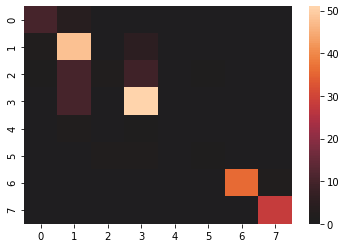

              precision    recall  f1-score   support

     Biomass       0.77      0.71      0.74        14
        Coal       0.65      0.87      0.74        55
         Gas       0.50      0.09      0.15        23
       Hydro       0.75      0.84      0.79        61
     Nuclear       0.00      0.00      0.00         3
         Oil       0.50      0.20      0.29         5
       Solar       1.00      0.95      0.97        38
        Wind       0.93      1.00      0.97        28

    accuracy                           0.78       227
   macro avg       0.64      0.58      0.58       227
weighted avg       0.75      0.78      0.74       227



In [139]:
RF_tuned= RandomForestClassifier(criterion= 'gini', max_depth=10, min_samples_leaf=5)
RF_tuned.fit(xr_train, yr_train)
print("==========RANDOM FOREST CLASSIFIER===========")
evaluate_model(RF_tuned,xr_train, xr_test, yr_train, yr_test)

- With parameter tuning, the accuracy of the model didnt increase instead reduced by 8%

In [157]:
summary1 = pd.DataFrame({'Model' : ['logistic_regression','knn','ada boost','Decisiontree','random forest',
                                    'gaussian_nb','randomforest_tuned'],
                      'accuracy_score': [0.725,0.758,0.637,0.819,0.828,0.626,0.775]})
                     

summary1.sort_values(by='accuracy_score',ascending=False)

,Model,accuracy_score
4,random forest,0.828
3,Decisiontree,0.819
6,randomforest_tuned,0.775
1,knn,0.758
0,logistic_regression,0.725
2,ada boost,0.637
5,gaussian_nb,0.626


- From the above all models that were built, we find that the random Forest model is having the highest accuracy.
- Hence it is the best fit model for predicting the power plant with primary fuel
- On performing the hyperparameter tuning, we were not able to increase the accuracy score
- As it is a multiclass classification, i.e.,7 classes, it is not possible to draw ROC curve

### Saving the model - Prediction with Primary_fuel

In [155]:
import pickle
filename = 'globalfuel.pkl'
pickle.dump(RF, open(filename, 'wb'))

In [156]:
model=pickle.load(open('globalfuel.pkl','rb'))
result=model.score(xr_test,yr_test)
print(result*100)

82.81938325991189
